# Ensemble Methods

In this notebook, we will be exploring three different types of ensemble methods:
* Hard Voting
* Bagging
* Random Forests
* Boosting

In general, we will combine the predictions of different types of models to make a more accurate prediction. The actual action of combination can vary and have different effects, which is what we will show in this notebook. For sake of simplicity, we will use Sci-kit Learn's model implementations.  

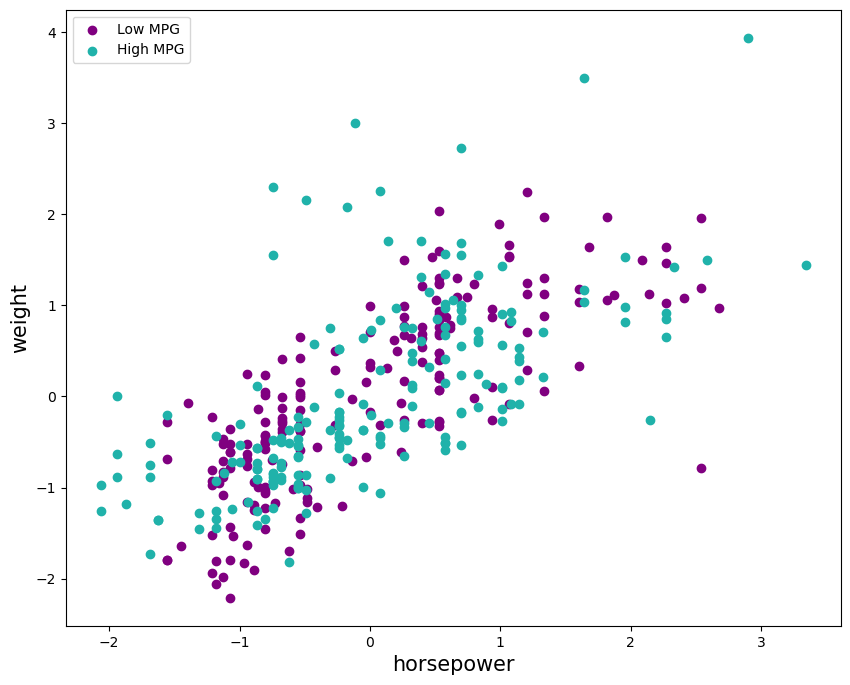

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

auto = pd.read_csv("/Users/kritinshanmugam/Downloads/auto-mpg.csv")
auto = auto[auto['horsepower'] != '?']
auto['mpg'] = np.where(auto['mpg'] < 23, 0, 1)

colors = ['purple', 'lightseagreen']
mpgs = [0, 1]

fig, ax = plt.subplots(figsize = (10, 8))
for efficiency, color in zip(mpgs, colors):
    temp_df = auto[auto['mpg'] == efficiency]
    temp_X = temp_df[['horsepower', 'weight']].astype('float64')
    temp_X = (temp_X - temp_X.mean())/temp_X.std()
    t_label = 'High MPG'
    
    if efficiency == 0:
        t_label = 'Low MPG'
    
    ax.scatter(temp_X['horsepower'],
               temp_X['weight'],
               c = color,
               label = t_label, 
               )
    
ax.set_xlabel("horsepower", fontsize = 15)
ax.set_ylabel("weight", fontsize = 15)
ax.legend()
plt.show()

X = auto.drop(['car name', 'mpg'], axis=1)
X = X.astype('float64')
X = (X - X.mean())/X.std()
X = X[['horsepower', 'weight']].astype('float64').values
y = auto['mpg'].astype('float64')

## Voting

Hard Voting refers to a simple method of combining predictions from multiple individual models. Each model in the ensemble makes its own prediction, and the final prediction for the ensemble is determined by taking a majority vote among these individual predictions.

Hard Voting Procedure:
* Each model in the ensemble is trained independently on the same dataset or different subsets of the data.

* When making predictions on a new instance, each model predicts the class label or outcome.

* In hard voting, the final prediction for the ensemble is determined by selecting the class label that received the most votes (i.e., the mode of the individual predictions).

Hard voting is intuitive and easy to understand. It tends to work well when the individual models in the ensemble are diverse and make uncorrelated errors. By combining the predictions of multiple models, hard voting can often lead to more accurate and robust predictions compared to any single model alone.










In [11]:
# Import classifier models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# import ensemble method 
from sklearn.ensemble import VotingClassifier

# split training data 
from sklearn.model_selection import train_test_split

# import metric 
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.4)

log_reg = LogisticRegression()
random_forest = DecisionTreeClassifier()
svm_class = SVC()

voting = VotingClassifier(
        estimators=[("logistic", log_reg), ("random forest", random_forest), ("svm", svm_class)],
        voting = "hard"
    )

# Now, train and predict all models to get their accuracy scores

svm_class.fit(X_train, y_train)
svm_y_predict = svm_class.predict(X_test)
print(f"svm accuracy: {accuracy_score(y_test, svm_y_predict)}")

log_reg.fit(X_train, y_train)
log_y_predict = log_reg.predict(X_test)
print(f"logistic regression accuracy: {accuracy_score(y_test, log_y_predict)}")

random_forest.fit(X_train, y_train)
rnd_y_predict = random_forest.predict(X_test)
print(f"random forest accuracy: {accuracy_score(y_test, rnd_y_predict)}")

voting.fit(X_train, y_train)
y_predict = voting.predict(X_test)
print(f"voting classifier accuracy: {accuracy_score(y_test, y_predict)}")



svm accuracy: 0.8726114649681529
logistic regression accuracy: 0.8789808917197452
random forest accuracy: 0.7961783439490446
voting classifier accuracy: 0.8726114649681529


## Bagging

Bagging, which stands for Bootstrap Aggregating, is another type of ensemble method. 

Here is a brief overview of how it works:

* Bootstrap Sampling: randomly select equally-sized subsets of the training data with replacement. This means that some instances may be selected multiple times, while others may not be selected at all

* Model Training: A base model (e.g., decision tree) is trained on each bootstrap sample independently. Because each sample is slightly different due to the random sampling with replacement, each base model learns from a slightly different perspective.

* Aggregation: Once all base models are trained, bagging aggregates their predictions to make the final prediction. The most common aggregation method is averaging the predictions for regression tasks or taking a majority vote for classification tasks.


Bagging helps in reducing overfitting and improving generalization by introducing diversity among the base models. It stabilizes the learning process by reducing the variance of the models, especially in situations where the base model tends to overfit the training data. Since bagging also trains models parallely, it can greatly speed up the training process. 

In [12]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Train and predict using a small decision tree
small_tree = DecisionTreeClassifier(max_depth=1, random_state=31)
small_tree.fit(X_train, y_train)
small_preds = small_tree.predict(X_test)
print("Small Tree Classification")
print(classification_report(y_test, small_preds), "\n")

# Train and predict using a medium decision tree
medium_tree = DecisionTreeClassifier(max_depth=6, random_state=31)
medium_tree.fit(X_train, y_train)
med_preds = medium_tree.predict(X_test)
print("Medium Tree Classification")
print(classification_report(y_test, med_preds), "\n")

# Bagging classifier
bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=2, random_state=31),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)

bagging.fit(X_train, y_train)
bag_preds = bagging.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_preds), "\n")


Small Tree Classification
              precision    recall  f1-score   support

         0.0       0.95      0.76      0.84        78
         1.0       0.80      0.96      0.87        79

    accuracy                           0.86       157
   macro avg       0.88      0.86      0.86       157
weighted avg       0.88      0.86      0.86       157
 

Medium Tree Classification
              precision    recall  f1-score   support

         0.0       0.86      0.76      0.80        78
         1.0       0.78      0.87      0.83        79

    accuracy                           0.82       157
   macro avg       0.82      0.81      0.81       157
weighted avg       0.82      0.82      0.81       157
 

Bagging Classification Report
              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85        78
         1.0       0.83      0.89      0.86        79

    accuracy                           0.85       157
   macro avg       0.86      0.85      0.

Here, we can see the general differences in accuracy between the different classifiers. The bagging method performs slightly better than the medium decision tree. The performance will no doubt vary depending on the dataset and the max_depth chosen. 

Now, let's see how the decision boundaary varies between the two classification methods! 

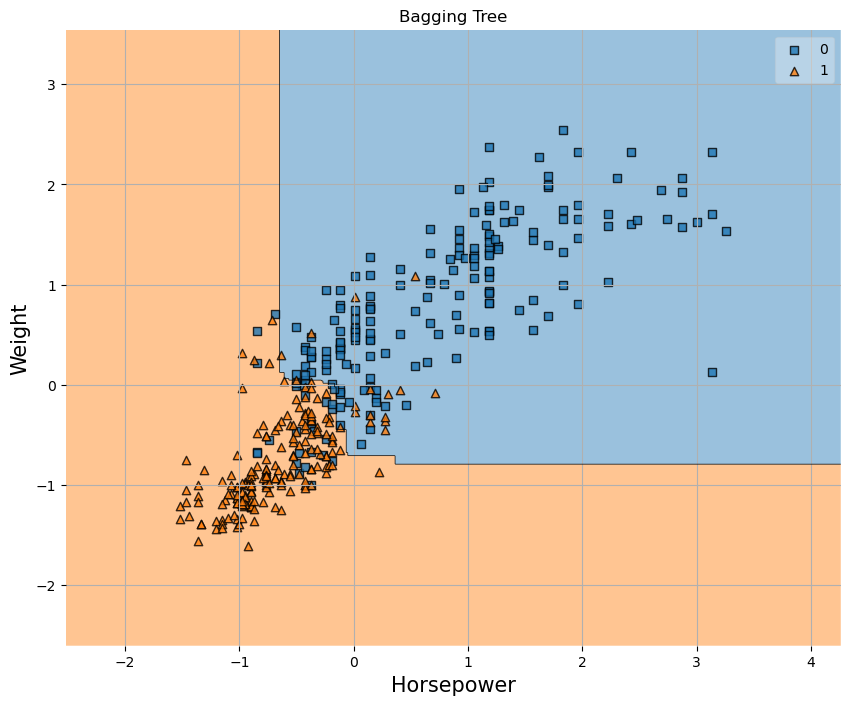

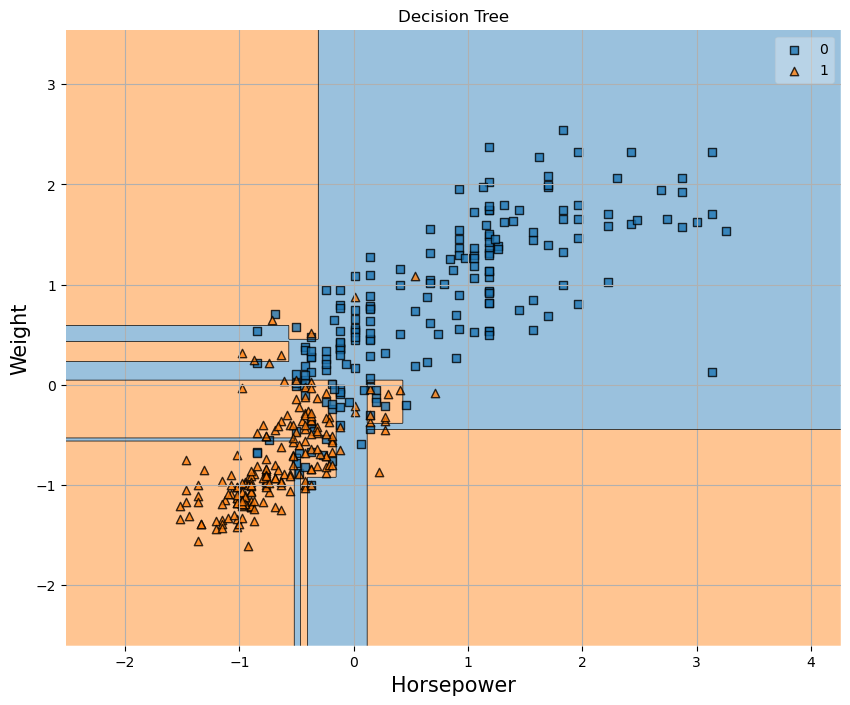

In [13]:
from mlxtend.plotting import plot_decision_regions

y = y.astype('int').values
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bagging)
plt.xlabel("Horsepower", fontsize = 15)
plt.ylabel("Weight", fontsize = 15)
plt.title("Bagging Tree")
plt.grid()
plt.show()

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = medium_tree)
plt.xlabel("Horsepower", fontsize = 15)
plt.ylabel("Weight", fontsize = 15)
plt.title("Decision Tree")
plt.grid()
plt.show()

Here, we can see that the bagging classifier chooses a much different decision boundary!

## Random Forest 

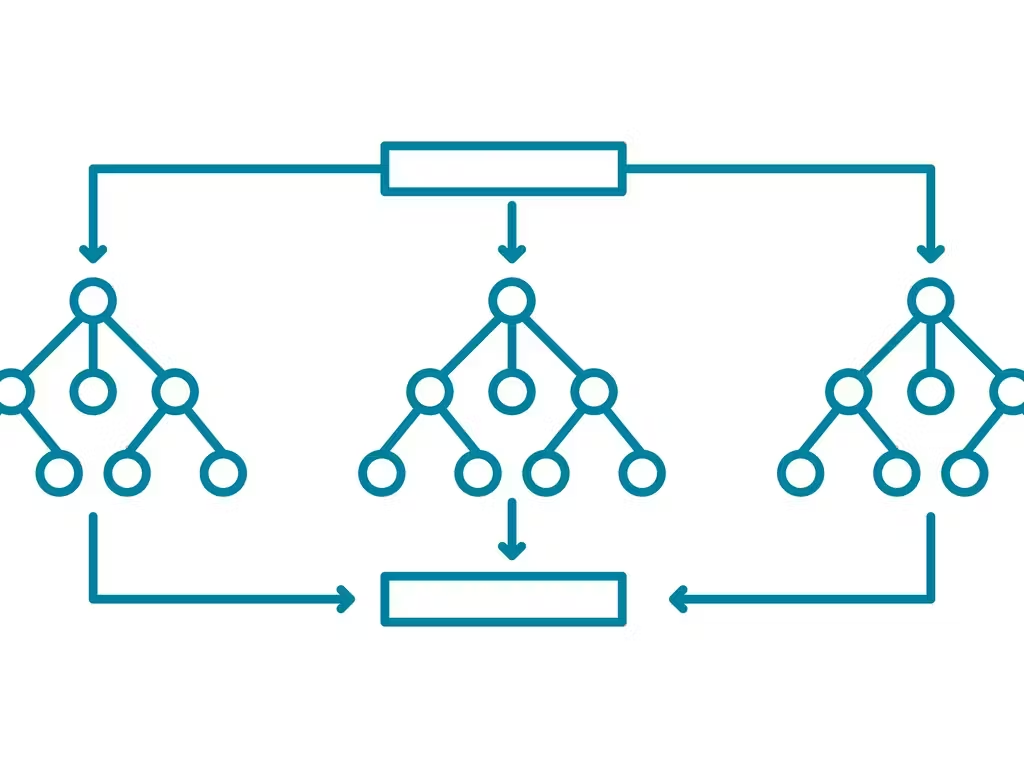

We sort of implemented a Random Forest with the above example of bagging, since we chose a decision tree as the base model. However, we can use Sci-Kit Learn's RandomForestClassifier module to utilize the actual random forest algorithm. It incorporates additional randomness during tree growth. Rather than solely seeking the best feature for node splitting, it selects from a random subset of features. This approach fosters a broader range of trees, thereby reducing the variance of the resulting model even further.

Let's quickly demonstrate the Random Forest Classifier on our data. We can also show the feature importance capabilities of Random Forest Classifiers. 

Random Forest Classification
              precision    recall  f1-score   support

         0.0       0.84      0.83      0.84        78
         1.0       0.84      0.85      0.84        79

    accuracy                           0.84       157
   macro avg       0.84      0.84      0.84       157
weighted avg       0.84      0.84      0.84       157



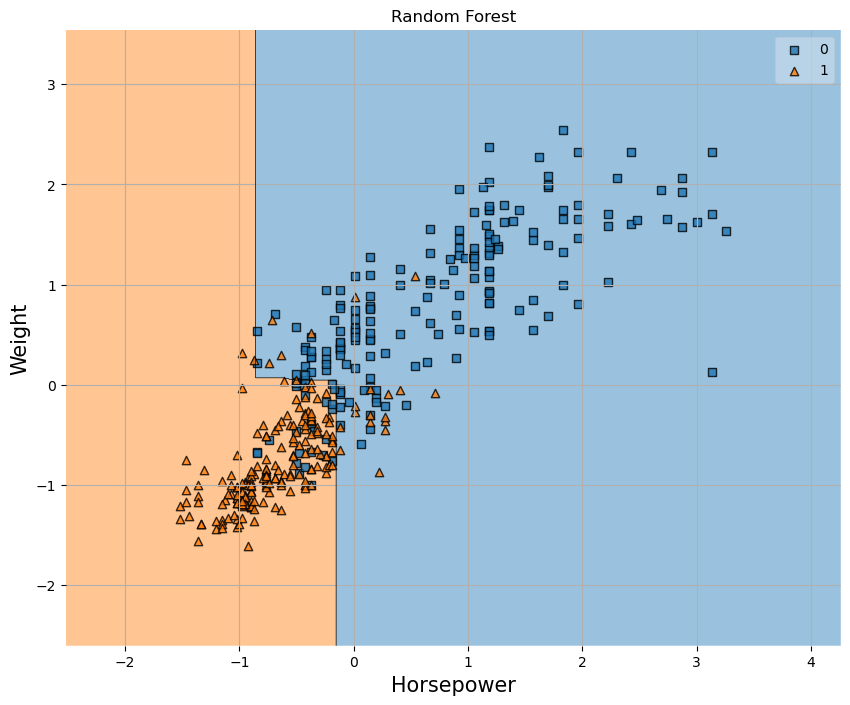

In [14]:
from sklearn.ensemble import RandomForestClassifier

random_tree = RandomForestClassifier(max_depth=2)
random_tree.fit(X_train, y_train)
random_predictions = random_tree.predict(X_test)
print("Random Forest Classification")
print(classification_report(y_test, random_predictions))

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = random_tree)
plt.xlabel("Horsepower", fontsize = 15)
plt.ylabel("Weight", fontsize = 15)
plt.title("Random Forest")
plt.grid()
plt.show()


### Feature Importance

Random Forests allow us to easily know the level of importance of specific features when making predictions. Here, we are simply getting the importance values of the two features we used. 

In [15]:
features = ['horsepower', 'weight']

for name, score in zip(features, random_tree.feature_importances_):
    print(name, score)

horsepower 0.5435435160151288
weight 0.4564564839848711


## Gradient Boosting

Boosting is another type of ensemble technique. The idea behind boosting is to sequentially train weak models and emphasize the data points that previous models misclassified. This way, subsequent models focus more on the difficult-to-classify examples, gradually reducing the overall error. There are different types of boosting, like Adaptive Boosting and Gradient Boosting. 

Gradient Boosting is a well-known boosting algorithm, where instead of adjusting the weights of data points, each new model in the sequence is trained to predict the residuals of the previous model. This approach minimizes the overall error by iteratively improving the model's predictions.

To illustrate the advantage of gradient boosting, say we have two regressors. The first regressor's residuals are represented with: $e_1 = \hat{y_1} - y_1$ 

Our second regressor will train with the original features and new labels $y_2 = e_1$. Then, the residuals of our second regressor can be represented with: $e_2 = y_2 - \hat{y_2}. Therefore, it follows that the labels $y = \hat{y_1} + e_1 = \hat{y_1} + \hat{y_2} + e_2$, where $e_1 > e_2$. The predictions thus are more accurate when we perform gradient boosting. 

In the following cells, we will focus on gradient boosting. 



Gradient Boosting Classification
              precision    recall  f1-score   support

         0.0       0.89      0.86      0.88        78
         1.0       0.87      0.90      0.88        79

    accuracy                           0.88       157
   macro avg       0.88      0.88      0.88       157
weighted avg       0.88      0.88      0.88       157



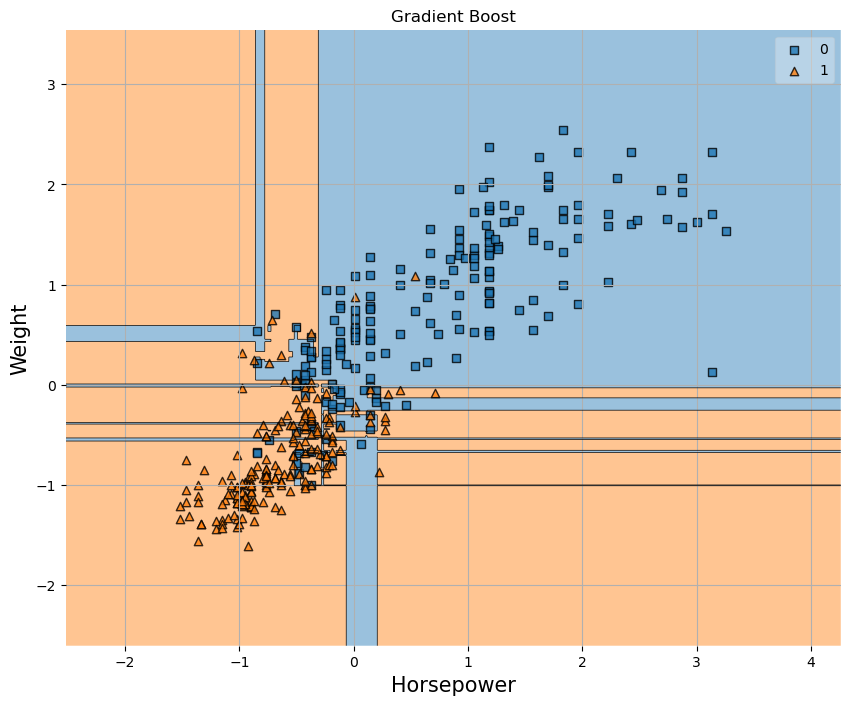

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

gboost = GradientBoostingClassifier(max_depth = 6, n_estimators = 150, learning_rate=0.2, random_state=31)

gboost.fit(X_train, y_train)

gboost_preds = gboost.predict(X_test)

print("Gradient Boosting Classification")
print(classification_report(y_test, gboost_preds))

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = gboost)
plt.xlabel("Horsepower", fontsize = 15)
plt.ylabel("Weight", fontsize = 15)
plt.title("Gradient Boost")
plt.grid()
plt.show()


Great! If we remember above, we previously implemented a normal Decision Tree with max depth 6. That model achieved a F1 score of 0.81, while our gradient boosting model achieved a F1 of 0.88. In our case, with our certain dataset, gradient boosting methods perform better. This might not always be the case, as it can depend on the dataset. 

## Conclusion

In this notebook, we perfomed explorations into three common types of ensemble methods: Hard Voting, Bagging, and Random Forests. We first explained each method's procedure, and then we compared the performance of each method to the standard, non-ensemble methods. 

In all cases, the ensemble methods performed as well or better than the standard methods. Therefore, they are simple ways to strengthen and stabilize existing models. The machine learning models become more robust against outliers and noise within the data. 